In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Data Science Project: Planning Stage
#### Name: Daniel Jung 
#### Student #: 13449384 

### (1) Data Description:
The provided data consists of two CSV files, players.csv and sessions.csv

**Dataset Summary**
- players.csv: 196 observations (players) and 7 variables.
- sessions.csv: 1535 observations (sessions) and 5 variables.

**player.csv**
| Variable | Data Type | Description |
| :--- | :--- | :--- |
| experience | character  | The player's self-reported experience level (e.g., Amateur, Veteran). |
| subscribe | logical | Whether the player subscribed to a newsletter (TRUE/FALSE). |
| hashedEmail | character | A hashed identifier** for each player. |
| played_hours| numeric | Total hours played by the player. |
| name | character | The player's name. |
| gender | character  | The player's self-reported gender. Contains 7 unique categories. |
| Age | numeric | The player's age.

**sessions.csv**
| Variable | Data Type (in R) | Description |
| :--- | :--- | :--- |
| hashedEmail | character | The player ID, used to link to the `players.csv` file (Foreign Key). |
| start_time | character | The session start time.|
| end_time | character | The session end time. Note: 2 missing values and requires conversion to a datetime object. |
| original_start_time | numeric | The session start time as a Unix timestamp. |
| original_end_time | numeric | The session end time as a Unix timestamp. |


#### Key Data Issues and Potential Problems

1.  **Missing Data:**
    * `players.csv`: 2 missing values exist in the `Age` column.
    * `sessions.csv`: 2 missing values exist in the `end_time` and `original_end_time` columns.
2.  **Data Type Conversion:**
    * The experience and gender variables are loaded as character data types but must be converted to factor for appropriate statistical modeling in R.


### (2) Questions:
**Research Question:** Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

**Goal**: To identify the key player characteristics and behaviors that most strongly predict newsletter subscription and to understand how these predictive factors vary among different player types.

**Data Wrangle Plan**:
- The categorical variables `gender` and `experience` must be converted from `character` to `factor` type for use in the model.
- The 7 categories in the `gender` variable may need to be grouped into fewer levels (e.g., 'Male', 'Female', 'Other').


### (3) Exploratory Data Analysis and Visualization
To prepare the dataset for analysis, we first convert the variables gender and experience from character strings to categorical factors, ensuring they are properly handled in subsequent statistical procedures and visualizations.
Next, we compute summary metrics including total play hours and the mean age of players to establish a foundational understanding of the player base.

To deepen our understanding of behavioural and demographic patterns within the dataset, we visualize key variables such as age, experience level, and newsletter subscription status

In [8]:
players <- read_csv("data/players.csv") |>
    mutate(gender = as.factor(gender), experience = as.factor(experience))
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<fct>,<lgl>,<chr>,<dbl>,<chr>,<fct>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [10]:
players_mean <- players |>
    summarise(
        mean_played_hours = mean(played_hours, na.rm = TRUE),
        mean_Age = round(mean(Age, na.rm = TRUE), 2)
    )
players_mean    

mean_played_hours,mean_Age
<dbl>,<dbl>
5.845918,21.14


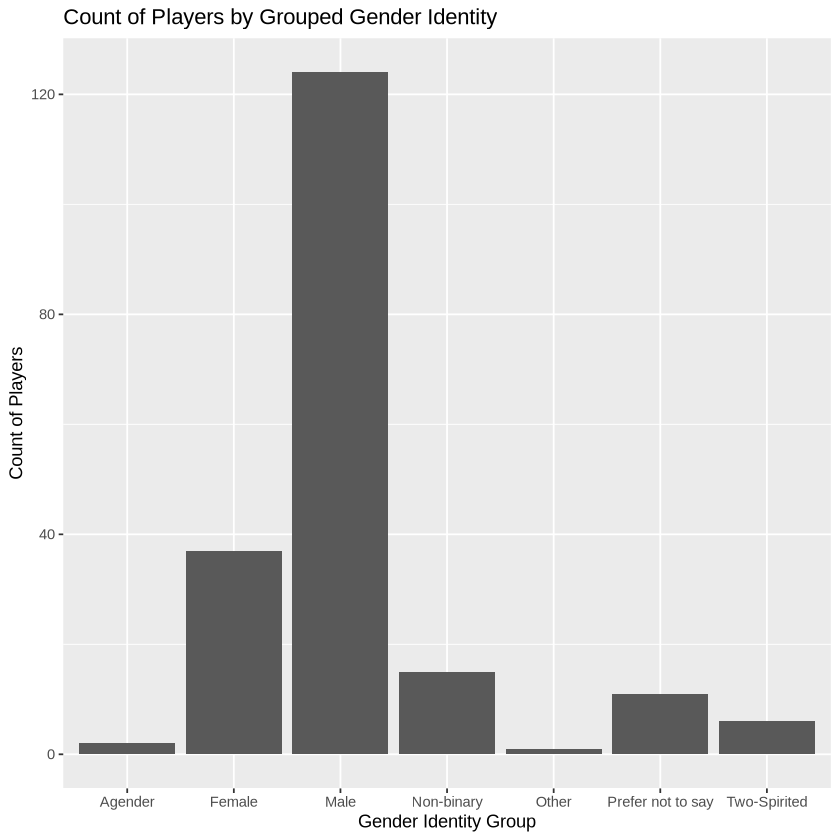

In [11]:
gender_plot <- players |>
    ggplot(aes(x=gender)) +
    geom_bar() +
    labs(
        title = "Count of Players by Grouped Gender Identity",
        x = "Gender Identity Group",
        y = "Count of Players"
    )
gender_plot

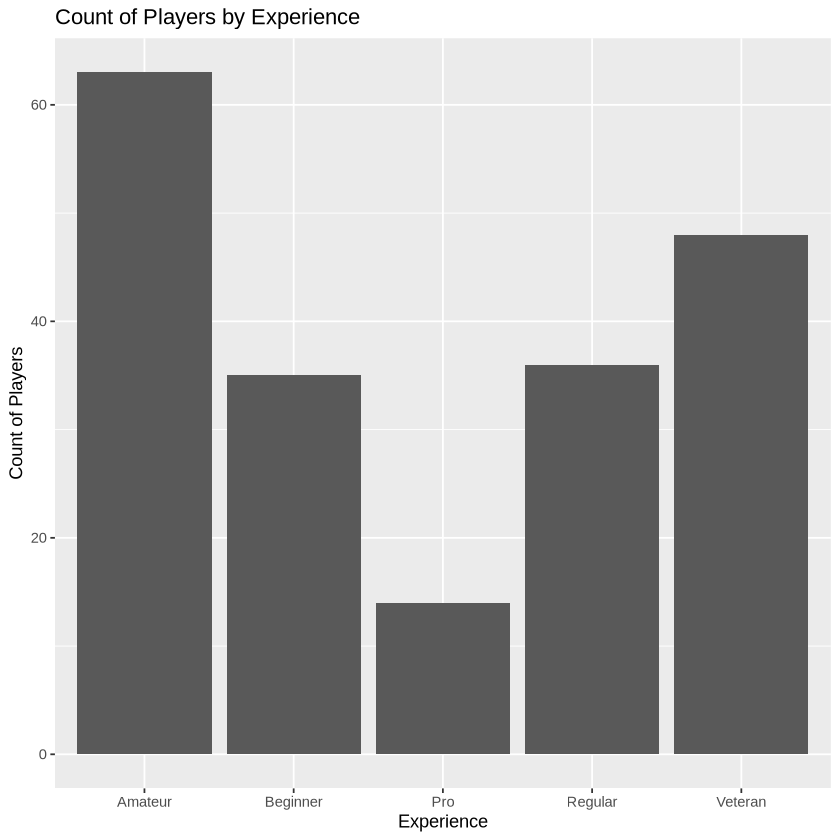

In [12]:
experience_plot <- players |>
    ggplot(aes(x=experience)) +
    geom_bar() +
    labs(
        title = "Count of Players by Experience",
        x = "Experience",
        y = "Count of Players"
    )
experience_plot

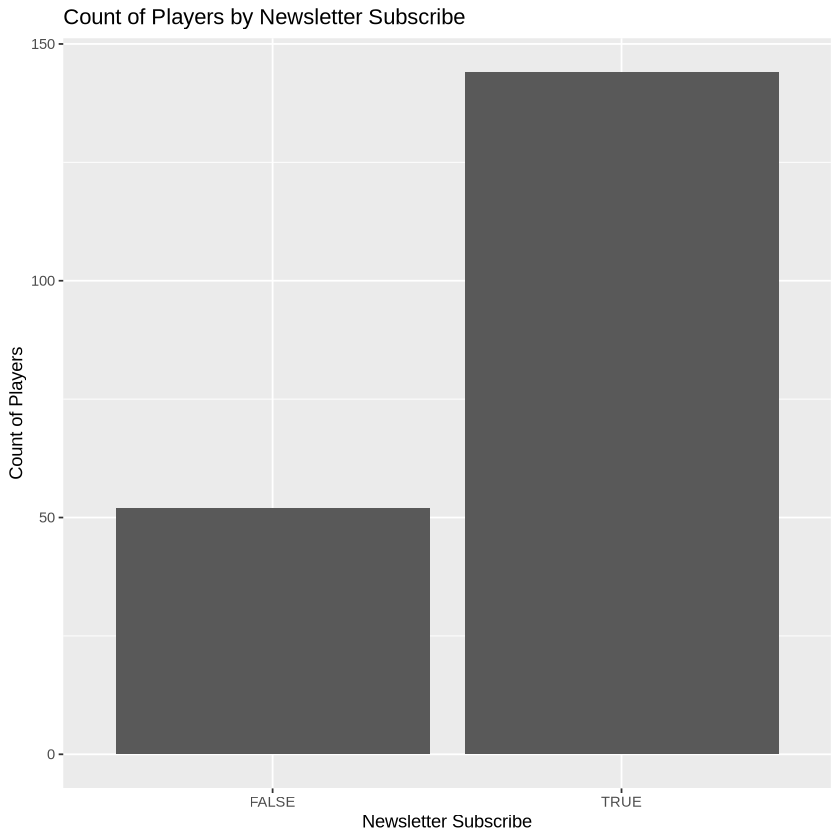

In [16]:
subscribe_plot <- players |>
    ggplot(aes(x = subscribe)) +
    geom_bar() +
    labs(
        title = "Count of Players by Newsletter Subscribe",
        x = "Newsletter Subscribe",
        y = "Count of Players"
    )
subscribe_plot

### (4) Methods and Plan

Proposed Method: K-Nearest Neighbors (KNN) Classification

To predict whether a player will subscribe to the game-related newsletter based on Age, Gender, and Experience, we propose using KNN, a simple and flexible classification method suitable for binary outcomes.

**Why this method is appropriate:**
- KNN is non-parametric and makes no assumptions about the data distribution.

- It handles non-linear relationships between features and the target.


### (5) GitHub Repository
https://github.com/devinjae/Project-Planning-Stage
